In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import prewitt, roberts
from skimage.segmentation import watershed
from skimage.feature import canny
from scipy import ndimage as ndi

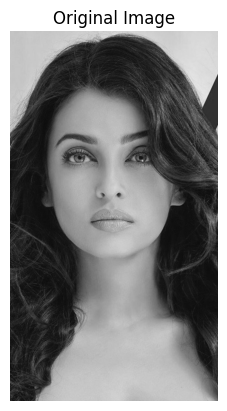

In [4]:
# Read the image
image = cv2.imread('/content/aish_rai.jpg')

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Original Image")
plt.show()


In [5]:
height, width, channels = image.shape
print(f"Image Size: Width={width}, Height={height}, Channels={channels}")

Image Size: Width=736, Height=1308, Channels=3


In [6]:
total_pixels = height * width
print(f"Total Pixels: {total_pixels}")

Total Pixels: 962688


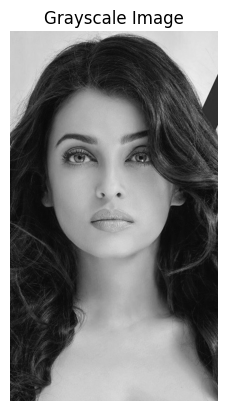

In [7]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Save and Display
cv2.imwrite('/content/grayscale_image.jpg', gray_image)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title("Grayscale Image")
plt.show()

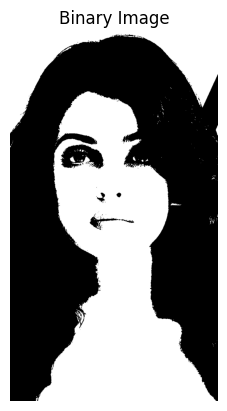

Black Pixel Count: 536512


In [8]:
# Set threshold
threshold_value = 127
_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

# Count black pixels
black_pixel_count = np.sum(binary_image == 0)

# Save and Display
cv2.imwrite('/content/binary_image.jpg', binary_image)
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.title("Binary Image")
plt.show()

print(f"Black Pixel Count: {black_pixel_count}")

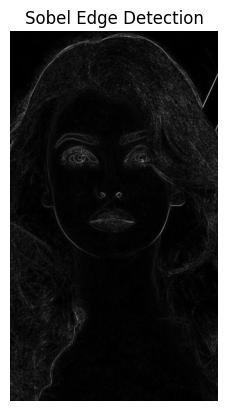

In [9]:
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

plt.imshow(sobel_edges, cmap='gray')
plt.axis('off')
plt.title("Sobel Edge Detection")
plt.show()


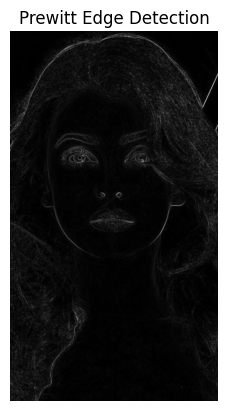

In [10]:
prewitt_edges = prewitt(gray_image)

plt.imshow(prewitt_edges, cmap='gray')
plt.axis('off')
plt.title("Prewitt Edge Detection")
plt.show()

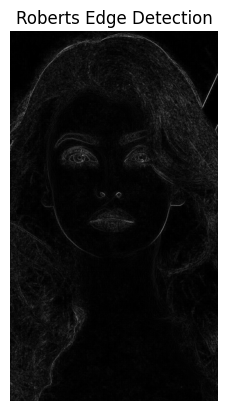

In [11]:
roberts_edges = roberts(gray_image)

plt.imshow(roberts_edges, cmap='gray')
plt.axis('off')
plt.title("Roberts Edge Detection")
plt.show()

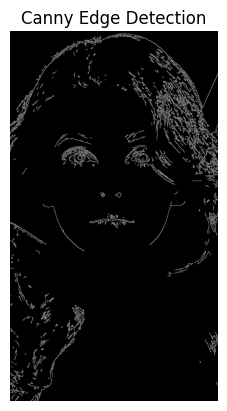

In [12]:
canny_edges = cv2.Canny(gray_image, 100, 200)

plt.imshow(canny_edges, cmap='gray')
plt.axis('off')
plt.title("Canny Edge Detection")
plt.show()

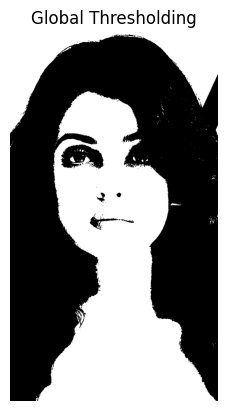

In [13]:
_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

plt.imshow(global_thresh, cmap='gray')
plt.axis('off')
plt.title("Global Thresholding")
plt.show()


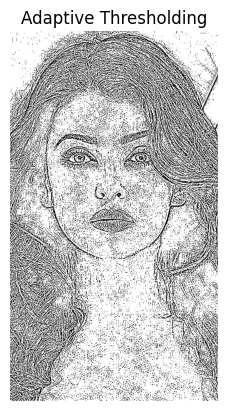

In [14]:
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.imshow(adaptive_thresh, cmap='gray')
plt.axis('off')
plt.title("Adaptive Thresholding")
plt.show()

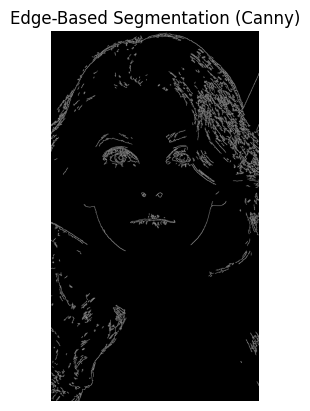

In [15]:
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')
plt.title("Edge-Based Segmentation (Canny)")
plt.show()


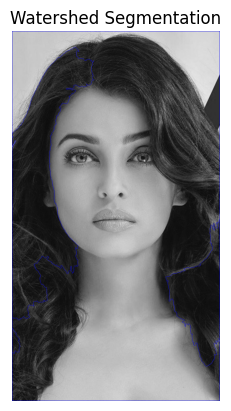

In [16]:
# Convert to grayscale and apply Otsu's threshold
_, binary = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Distance transform
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(binary, sure_fg)

# Marker labeling
_, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels to distinguish from unknown regions
markers = markers + 1
markers[unknown == 255] = 0

# Apply Watershed Algorithm
image_copy = image.copy()
cv2.watershed(image_copy, markers)
image_copy[markers == -1] = [255, 0, 0]  # Mark boundaries in red

plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Watershed Segmentation")
plt.show()
